# Reconstruction of band using Markov Random Field Model

## Model setup

In [1]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

from fuller.mrfRec import MrfRec
from fuller.utils import loadHDF

import os

In [2]:
data_path = '../' # Put in Path to a storage of at least 20 Gbyte free space.
if not os.path.exists(data_path + "/data.zip"):
    os.system(f"curl -L --output {data_path}/data.zip https://zenodo.org/records/7314278/files/data.zip")
if not os.path.isdir(data_path + "/data"):
    os.system(f"unzip -d {data_path} -o {data_path}/data")

In [3]:
# Load preprocessed data
data = loadHDF('../data/pes/1_sym.h5')
E = data['E']
kx = data['kx']
ky = data['ky']
I = data['V']

In [4]:
# Create MRF model
mrf = MrfRec(E=E, kx=kx, ky=ky, I=I, eta=.12)
mrf.I_normalized = True

## Initialization

In [5]:
# Initialize mrf model with band structure approximation from DFT
path_dft = '../data/theory/WSe2_PBEsol_bands.mat'

band_index = 4
offset = .5
k_scale = 1.1

kx_dft, ky_dft, E_dft = mrf.loadBandsMat(path_dft)
mrf.initializeBand(kx=kx_dft, ky=ky_dft, Eb=E_dft[band_index,...], offset=offset, kScale=k_scale, flipKAxes=True)

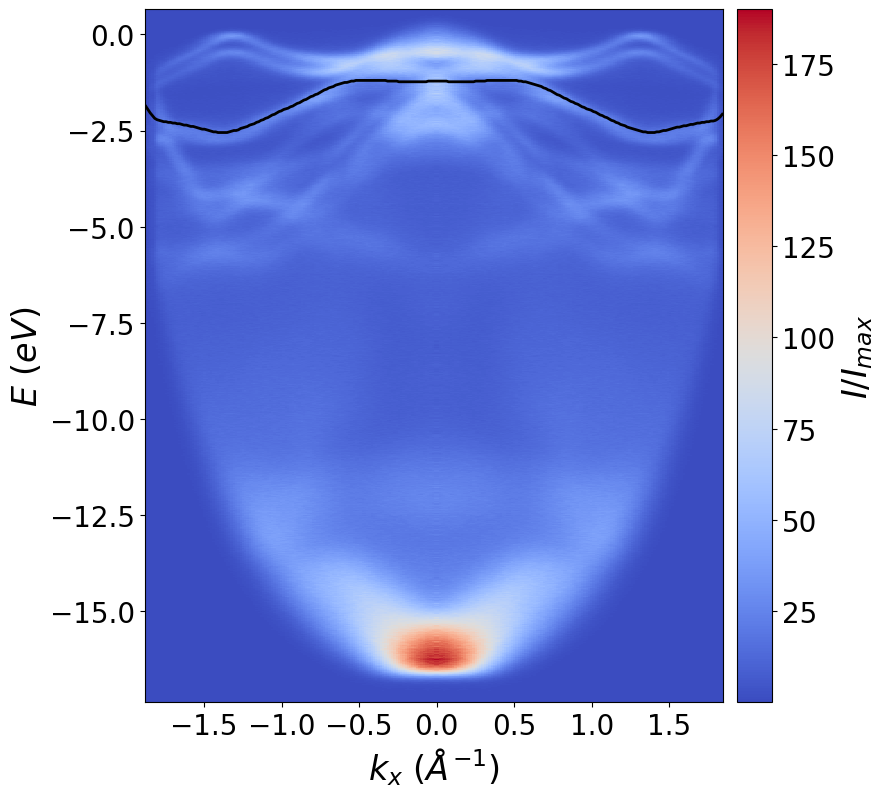

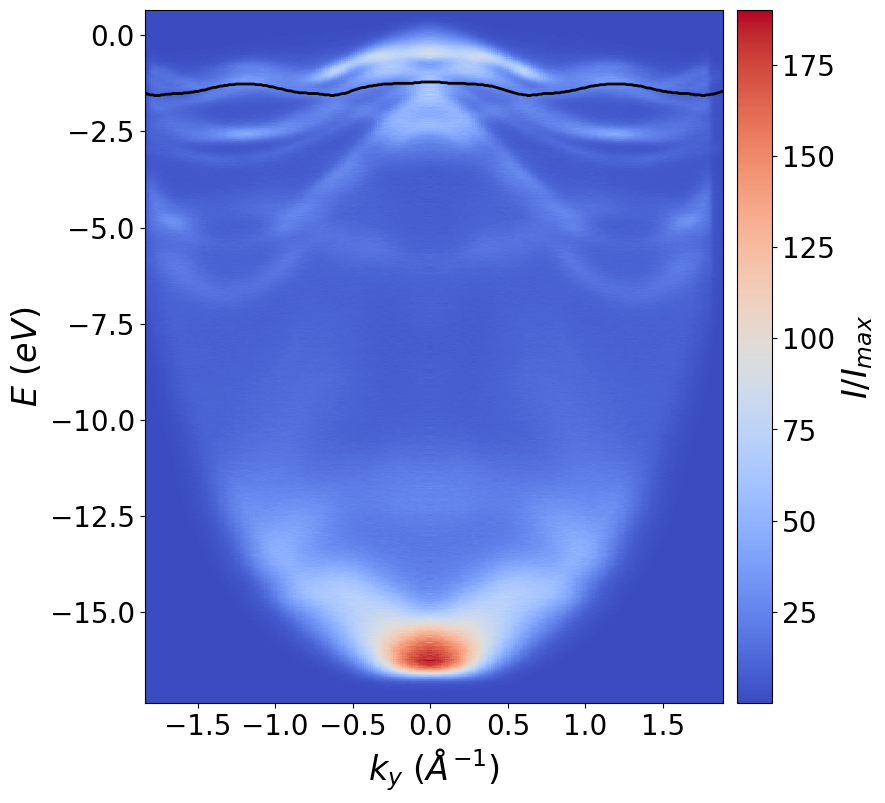

In [6]:
# Plot slices with initialiation to check offset and scale
mrf.plotI(ky=0, plotBandInit=True, cmapName='coolwarm')
mrf.plotI(kx=0, plotBandInit=True, cmapName='coolwarm')

## Reconstruction

In [7]:
# Run optimization to perform reconstruction
eta = .1
n_epochs = 150

mrf.eta = eta
mrf.iter_para(n_epochs)

2023-11-01 19:54:58.627145: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcuda.so.1
2023-11-01 19:54:58.711301: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1640] Found device 0 with properties: 
name: Tesla V100-PCIE-32GB major: 7 minor: 0 memoryClockRate(GHz): 1.38
pciBusID: 0000:25:00.0
2023-11-01 19:54:58.714986: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcudart.so.10.0
2023-11-01 19:54:58.767164: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcublas.so.10.0
2023-11-01 19:54:58.793598: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcufft.so.10.0
2023-11-01 19:54:58.802999: I tensorflow/stream_executor/platform/default/dso_loader.cc:42] Successfully opened dynamic library libcurand.so.10.0
2023-11-01 19:54:58.860926: I tensorflow/stream_executor/platfo

2023-11-01 19:54:59.325274: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1181] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-11-01 19:54:59.325342: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1187]      0 
2023-11-01 19:54:59.325364: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1200] 0:   N 
2023-11-01 19:54:59.336140: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1326] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 30591 MB memory) -> physical GPU (device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:25:00.0, compute capability: 7.0)
2023-11-01 19:54:59.340881: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x559594a53f90 executing computations on platform CUDA. Devices:
2023-11-01 19:54:59.340906: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Tesla V100-PCIE-32GB, Compute Capability 7.0
2023-11-01 19:55:02.837807: W tensorflow/compiler/jit/mark_for_compilati

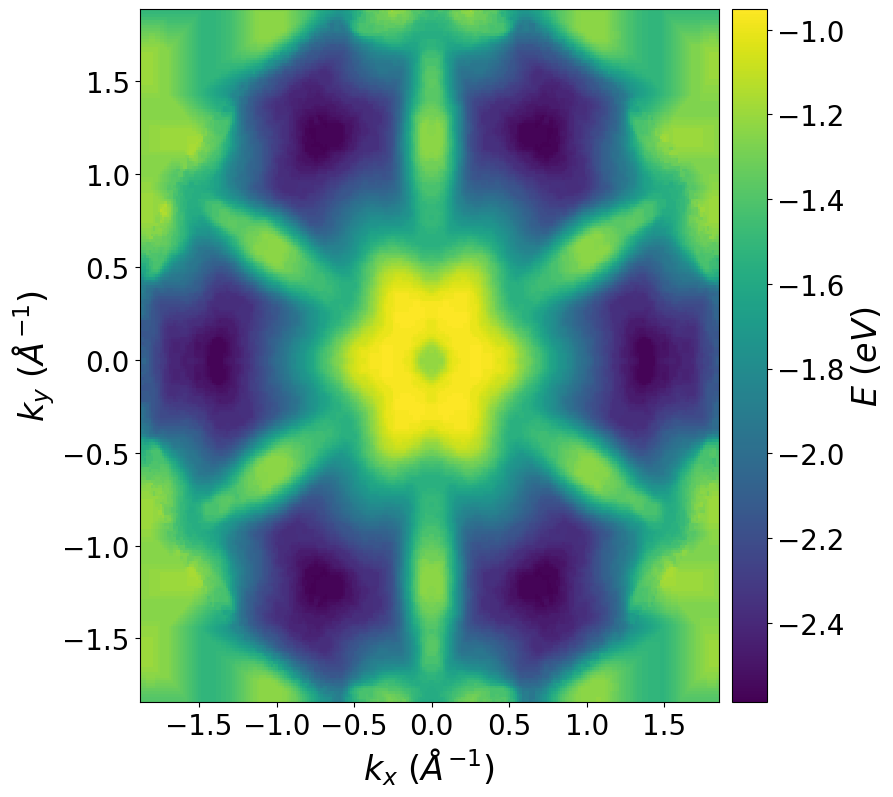

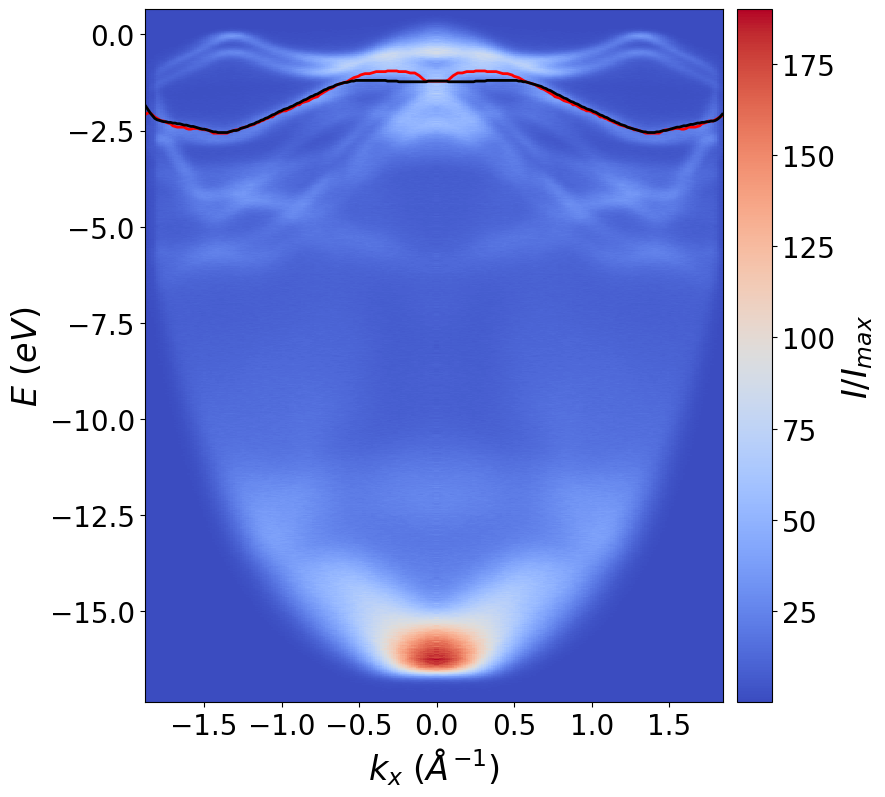

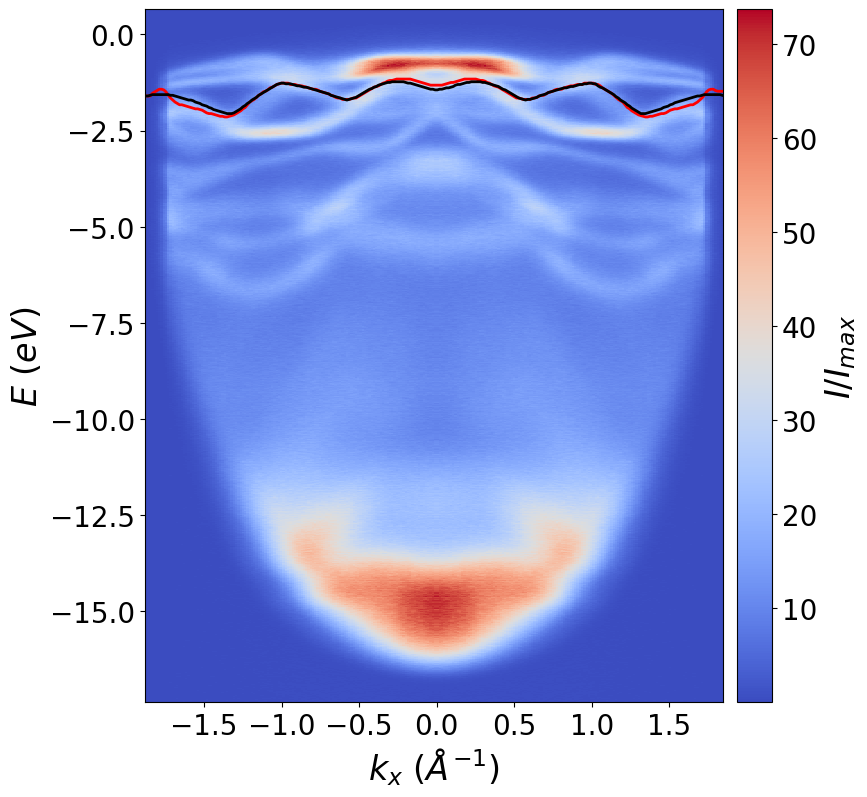

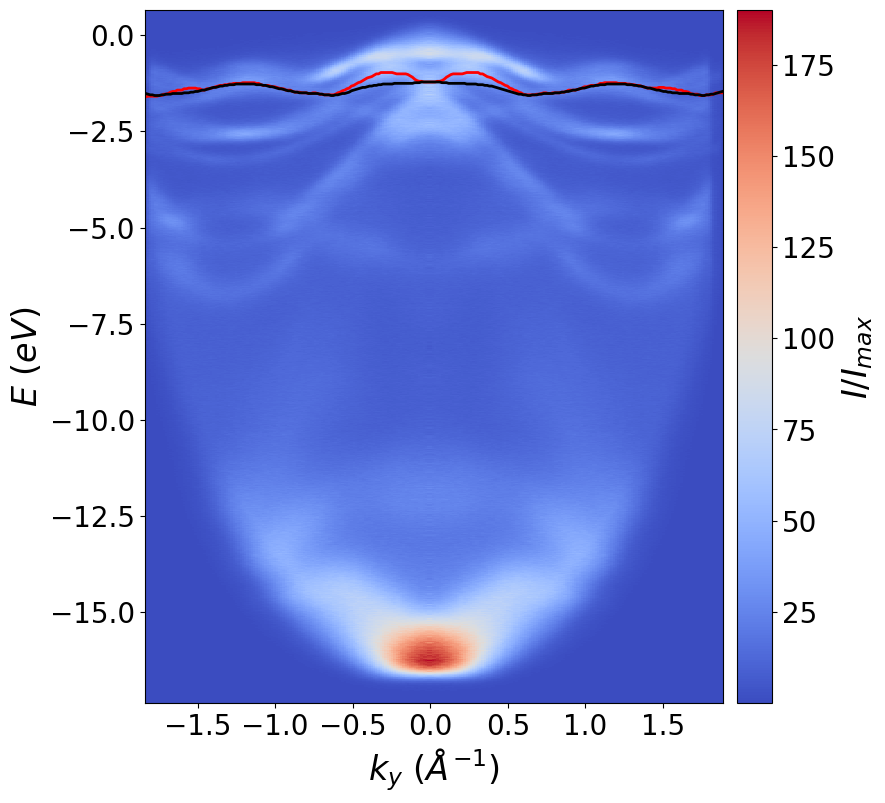

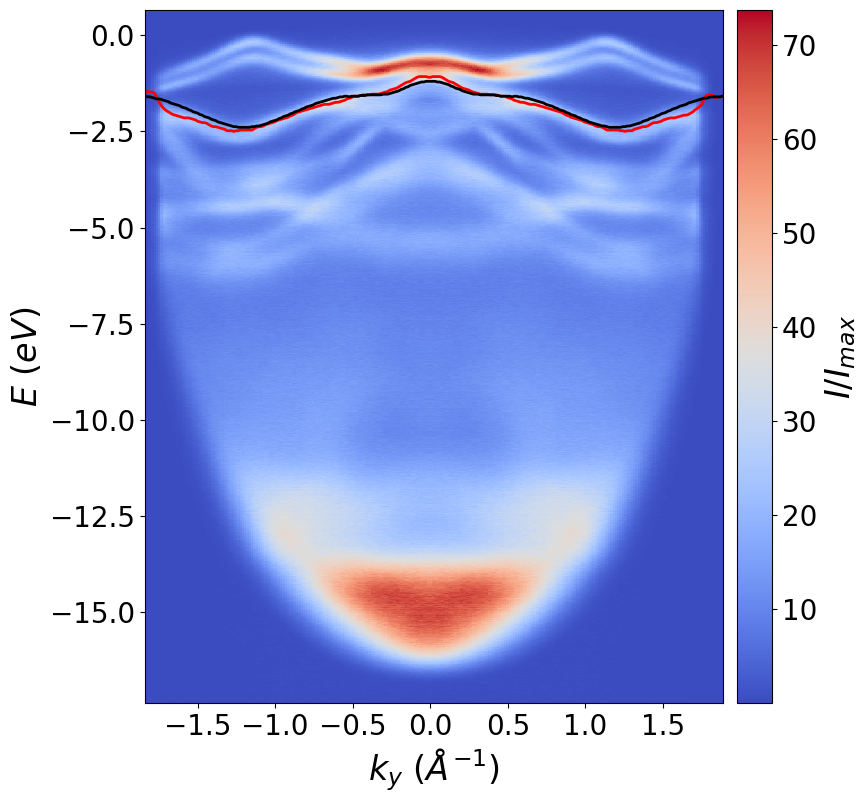

In [8]:
# Plot results
mrf.plotBands()
mrf.plotI(ky=0, plotBand=True, plotBandInit=True, plotSliceInBand=False, cmapName='coolwarm')
mrf.plotI(ky=0.5, plotBand=True, plotBandInit=True, plotSliceInBand=False, cmapName='coolwarm')
mrf.plotI(kx=0, plotBand=True, plotBandInit=True, plotSliceInBand=False, cmapName='coolwarm')
mrf.plotI(kx=0.5, plotBand=True, plotBandInit=True, plotSliceInBand=False, cmapName='coolwarm')

In [9]:
# Save results
path_save = 'reconstructed_bands'
mrf.saveBand(path_save + 'mrf_rec_%02i.h5' % band_index, index=band_index)